# #housing prices : Types of Regression and Stats


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.style.use('ggplot')
#ggplot is R based visualisation package that provides better graphics with higher level of abstraction
import os


 #https://www.kaggle.com/shrutimechlearn/types-of-regression-and-stats-in-depth

# Data Handling


In [120]:
housing_data = pd.read_csv('train.csv')
print housing_data.info()
#print len(housing_data.columns.values )
print housing_data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

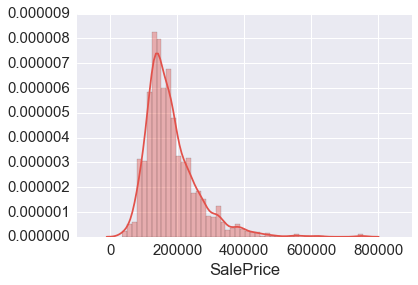

In [19]:
# Explore the Price columns
housing_data['SalePrice'].describe()
# It seems tthat the sale price are all positive
sns.distplot(housing_data['SalePrice']);
# it seems has right skew

In [20]:
print("Skewness: %f" % housing_data['SalePrice'].skew())
print("Kurtosis: %f" % housing_data['SalePrice'].kurt())


Skewness: 1.882876
Kurtosis: 6.536282


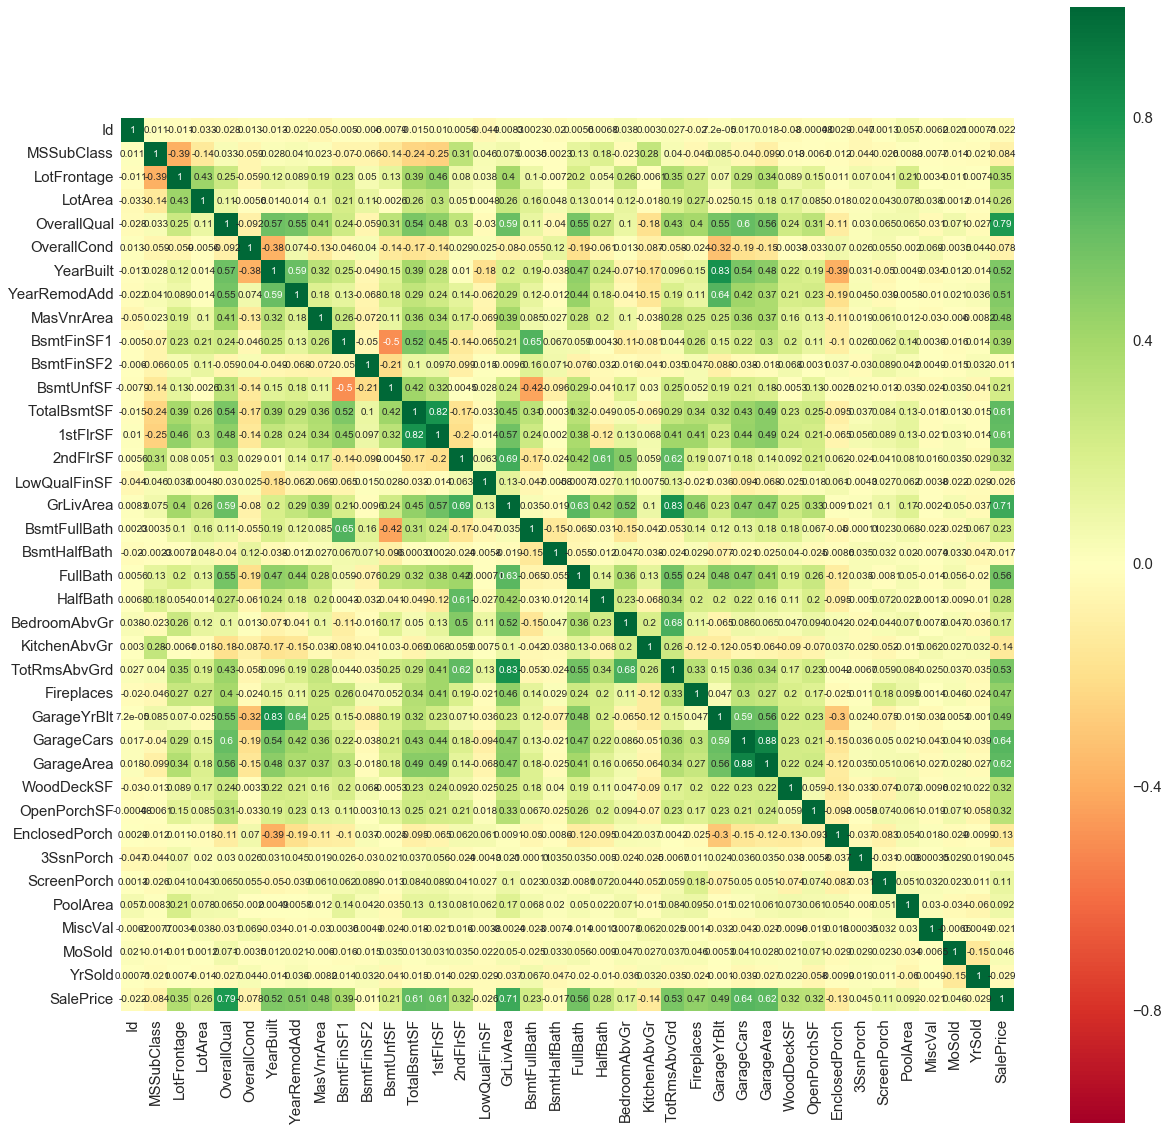

In [121]:
### 1.2. Univariate and Bivariate Data Exploration
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 20 by 20
p=sns.heatmap(housing_data.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

# Too many feature to analyse

Few observations from the above plot
1. The oveeral Qual,GRLivArea, garas cars, has a strong relation with the sale price
Table doesn't have a significant relation with price or any other variable as well ( We can try dropping that when making the model)


In [122]:
#From the covariance matrix we can get some values correlated with the data: 

CorrMat = housing_data.corr()
Corr_target = CorrMat.SalePrice.abs()
relevant_features = CorrMat.SalePrice[Corr_target>0.5]

print relevant_features
col= relevant_features.index

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64


In [123]:
  
col= col[0:10]


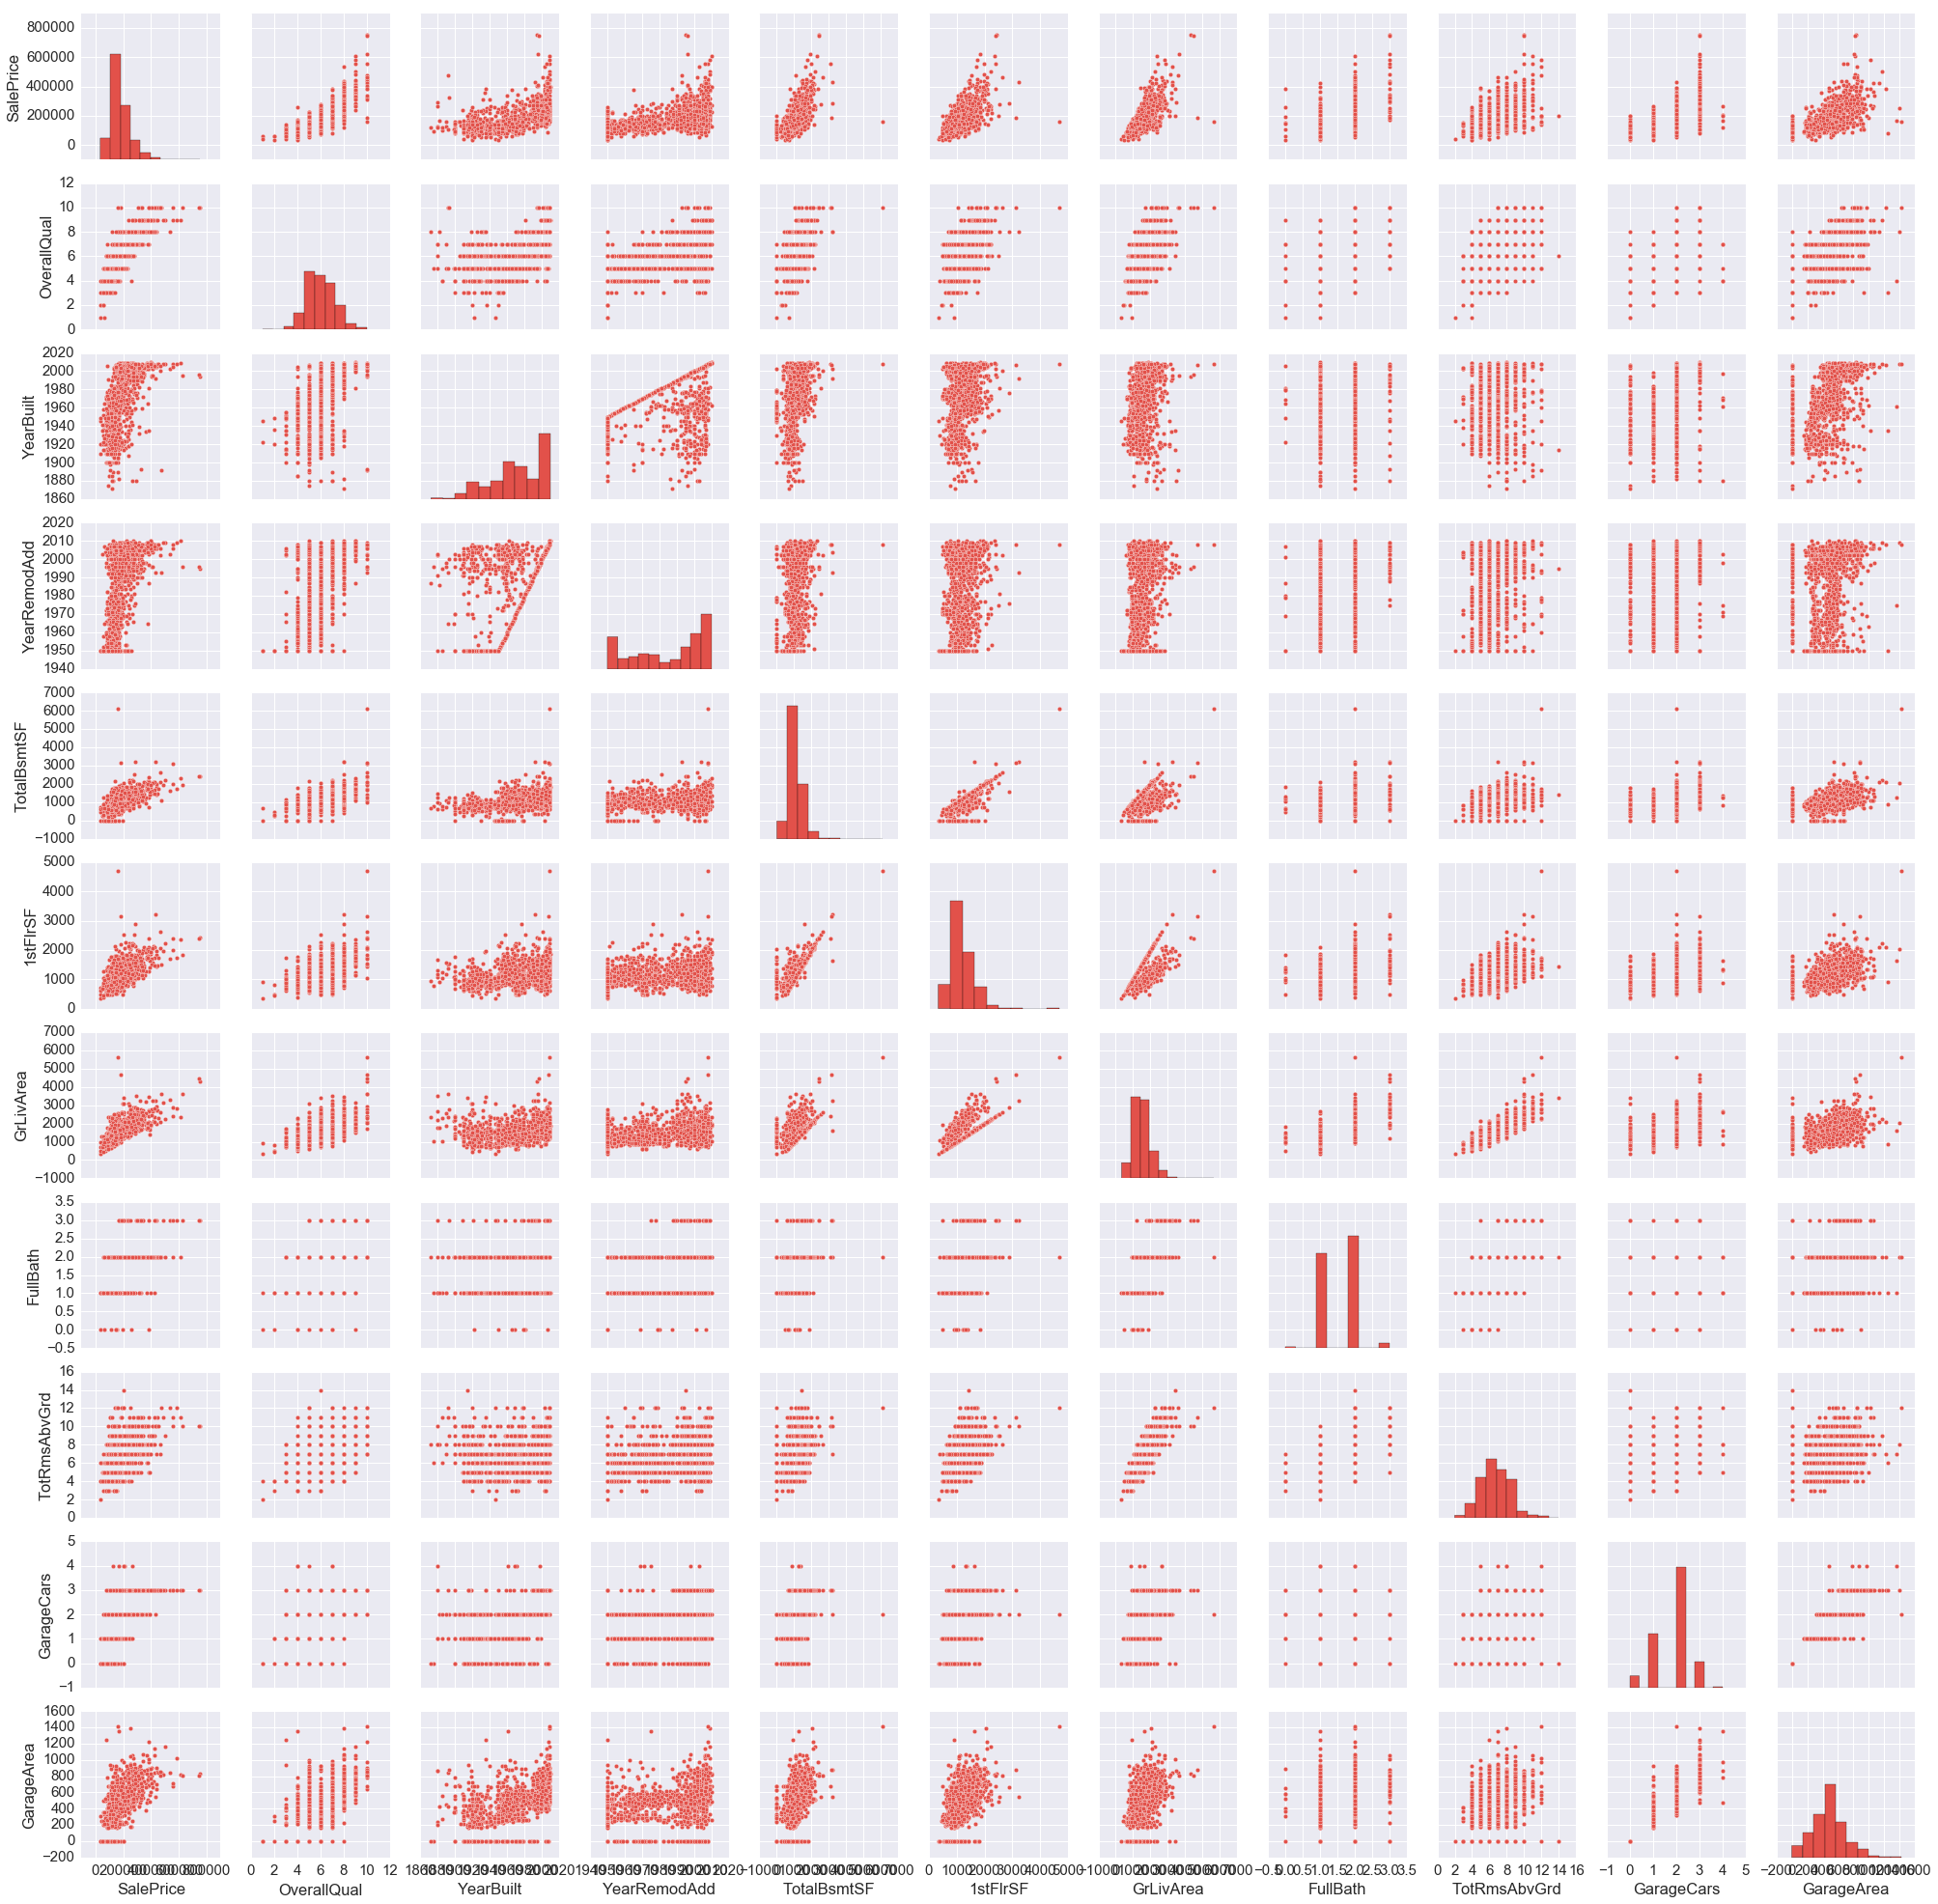

In [124]:
# sale price vs other numerical value
#col = ['GrLivArea','OverallQual','YearBuilt','YearRemodAdd']

data = pd.concat([housing_data['SalePrice'], housing_data[col]], axis=1)
#test.drop(test.select_dtypes(['object']), inplace=True, axis=1)
p = sns.pairplot(data)

In [125]:
# We need to check the correlation between all relevant features:
# intutively, we thought the garage
print len(col)
Corr2 = pd.DataFrame(CorrMat[col]) 
Corr2 = Corr2[Corr2.index.isin(col)] 
print Corr2 
print Corr2.shape


10
              OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  \
OverallQual      1.000000   0.572323      0.550684     0.537808  0.476224   
YearBuilt        0.572323   1.000000      0.592855     0.391452  0.281986   
YearRemodAdd     0.550684   0.592855      1.000000     0.291066  0.240379   
TotalBsmtSF      0.537808   0.391452      0.291066     1.000000  0.819530   
1stFlrSF         0.476224   0.281986      0.240379     0.819530  1.000000   
GrLivArea        0.593007   0.199010      0.287389     0.454868  0.566024   
FullBath         0.550600   0.468271      0.439046     0.323722  0.380637   
TotRmsAbvGrd     0.427452   0.095589      0.191740     0.285573  0.409516   
GarageCars       0.600671   0.537850      0.420622     0.434585  0.439317   
GarageArea       0.562022   0.478954      0.371600     0.486665  0.489782   

              GrLivArea  FullBath  TotRmsAbvGrd  GarageCars  GarageArea  
OverallQual    0.593007  0.550600      0.427452    0.600671    0.562022  
Y

In [126]:
# From the correlation matrix we drop all the correlated data >0.8 
selected_feature = Corr2.columns.values
df = Corr2[Corr2>0.8]
df = df[df<1]
df

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
OverallQual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearRemodAdd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalBsmtSF,NaN,NaN,NaN,NaN,0.81953,NaN,NaN,NaN,NaN,NaN
1stFlrSF,NaN,NaN,NaN,0.81953,NaN,NaN,NaN,NaN,NaN,NaN
GrLivArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.825489,NaN,NaN
FullBath,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotRmsAbvGrd,NaN,NaN,NaN,NaN,NaN,0.825489,NaN,NaN,NaN,NaN
GarageCars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.882475
GarageArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.882475,NaN


In [127]:
 
correlatedList = list(df[df.notnull()].stack().index) 
correlatedList[0:len(correlatedList)]



[('TotalBsmtSF', '1stFlrSF'),
 ('1stFlrSF', 'TotalBsmtSF'),
 ('GrLivArea', 'TotRmsAbvGrd'),
 ('TotRmsAbvGrd', 'GrLivArea'),
 ('GarageCars', 'GarageArea'),
 ('GarageArea', 'GarageCars')]

In [128]:
# It seems meaningful since garage cars and garage area are almost the same, totalSBSM 
feature = ['GarageArea','TotalBsmtDF','GrLivArea']


### Categorical Variable

In [135]:
## Correlation between a SalePrice and categorical variable
categorical_var =  housing_data.select_dtypes(include=['object']).columns.values
print categorical_var
len(categorical_var)


['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC'
 'CentralAir' 'Electrical' 'KitchenQual' 'Functional' 'FireplaceQu'
 'GarageType' 'GarageFinish' 'GarageQual' 'GarageCond' 'PavedDrive'
 'PoolQC' 'Fence' 'MiscFeature' 'SaleType' 'SaleCondition']


43

In [137]:
housing_data.LotShape.unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [138]:
housing_data.Neighborhood.unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)